# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
# from api_keys import api_key
api_key = "Redacted"

# Incorporated citipy to determine city based on latitude and longitude
import citipy #
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&q={city}&units={units}"


cityList = []
cloudiness = []
countries = []
dates = []
hums = []
lats = []
lngs = []
maxTemps = []
winds = []

print(f"""
Beginning Data Retrieval
- - - - - - - - - - - - -
""")

for city in cities:
    try:
#         city = city
        response = requests.get(f"{url}appid={api_key}&q={city}&units={units}").json()
        print(response["name"])
        cityList.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        hums.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemps.append(response["main"]["temp_max"])
        winds.append(response["wind"]["speed"])
    except:
        print("City not found. Skipping...")




Beginning Data Retrieval
- - - - - - - - - - - - -

Dikson
Hilo
Pontianak
Nagornskiy
City not found. Skipping...
New Norfolk
Avarua
Longyearbyen
Alta Floresta
Laguna
Tiznit
City not found. Skipping...
Ornskoldsvik
Banda Aceh
Jamestown
Kahului
Nikolskoye
Butaritari
Bluff
Busselton
Beyla
Beboto
Karhal
City not found. Skipping...
Coahuayana
City not found. Skipping...
City not found. Skipping...
Port Alfred
Talcahuano
Georgetown
Constitucion
Barrow
Victoria
Atuona
Mayumba
Gushikawa
Boa Vista
Bredasdorp
Ushuaia
Deputatskiy
Vila Velha
Albany
Sturgis
Clyde River
Kodiak
Vardo
Tasiilaq
Juxtlahuaca
Tuktoyaktuk
Muli
Marfino
Punta Arenas
Manzanillo
Bandar-e Lengeh
Haapiti
Lata
City not found. Skipping...
East London
Kijang
Mataura
Namibe
Civitavecchia
Half Moon Bay
Ostrovnoy
Port Lincoln
Cherskiy
Kavieng
City not found. Skipping...
Port Elizabeth
Lebu
Souillac
Bintulu
Mahebourg
Thetford Mines
Barcelos
Vaini
Upernavik
Cidreira
Gopamau
Cayenne
Ribeira Grande
Egvekinot
Hobart
Qeshm
Sokolo
Esperance

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Zip rows
rows = zip(cityList,cloudiness,countries,dates,hums,lats,lngs,maxTemps,winds)
headers = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']

# Write to CSV
with open(output_data_file, "w") as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    for row in rows:
        writer.writerow(row)
        

In [11]:
# Create Dataframe
df = pd.read_csv(output_data_file)
df.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,46,RU,1578093833,94,73.51,80.55,-7.37,15.50
1,Hilo,40,US,1578093701,58,19.71,-155.08,82.40,8.05
2,Pontianak,40,ID,1578093833,94,-0.02,109.34,78.80,2.86
3,Nagornskiy,100,RU,1578093833,97,58.77,57.55,32.95,12.86
4,New Norfolk,51,AU,1578093833,33,-42.78,147.06,80.01,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

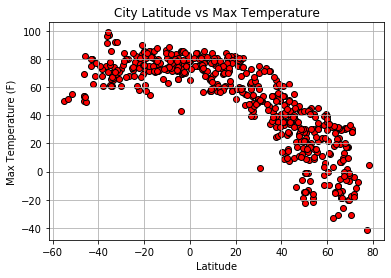

In [39]:
plt.scatter(df['Lat'],df['Max Temp'],color='r',edgecolors='black')
plt.title('City Latitude vs Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Images/Temp.png')

#### Latitude vs. Humidity Plot

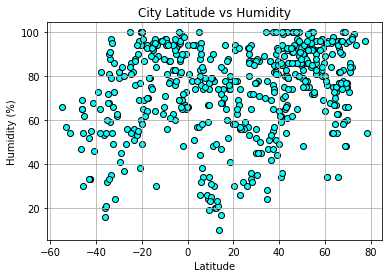

In [40]:
plt.scatter(df['Lat'],df['Humidity'],color='aqua',edgecolors='black')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Images/Humidity.png')

#### Latitude vs. Cloudiness Plot

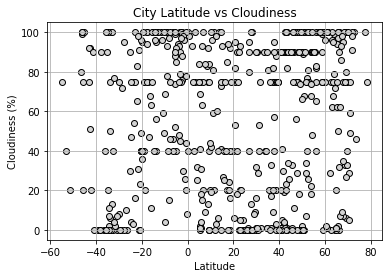

In [41]:
plt.scatter(df['Lat'],df['Cloudiness'],color='lightgrey',edgecolors='black')
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Images/Cloudiness.png')

#### Latitude vs. Wind Speed Plot

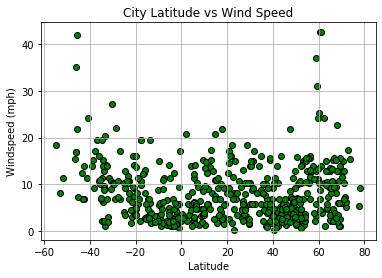

In [42]:
plt.scatter(df['Lat'],df['Wind Speed'],color='green',edgecolors='black')
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid()
plt.savefig('Images/Wind.png')